In [1]:
setwd("/data/park_lab/adam/Achilles/")
list.files()

[1] "CRISPRGeneEffect.csv"                  
[2] "DepMap-2018q3-celllines.csv"           
[3] "OmicsSomaticMutationsMatrixHotspot.csv"

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()



# Data Cleaning

In [3]:
AchillesRes <- read_csv("CRISPRGeneEffect.csv") %>% 
    as.data.frame()

New names:
• `` -> `...1`
Rows: 1100 Columns: 18444
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr     (1): ...1
dbl (18443): A1BG (1), A1CF (29974), A2M (2), A2ML1 (144568), A3GALT2 (12755...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
head(AchillesRes)

,...1,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),⋯,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ACH-000001,-0.122636586,0.02588131,0.03421726,-0.12808195,-0.031284892,0.338045663,-0.006439465,-0.093641962,0.189185518,⋯,-0.1317266,-0.03982935,0.17940487,0.28355223,0.20451311,-0.28972380,-0.06297177,0.074179880,0.111243743,-0.46790774
2,ACH-000004,0.019756256,-0.08364029,-0.06011770,-0.02741749,-0.036116045,-0.001055805,0.312875567,-0.086896745,0.204433523,⋯,-0.1703286,-0.45426346,0.19458282,0.09898882,0.12694809,0.03298280,-0.41039155,0.113156285,0.234387763,-0.08830615
3,ACH-000005,-0.107208315,-0.02321112,0.20020365,0.11603940,-0.172226779,-0.071294339,0.203270109,-0.127805911,-0.090981494,⋯,-0.3016955,-0.45496905,-0.06195940,-0.03642697,0.01660211,-0.20127275,-0.17887699,-0.055348830,-0.002161326,-0.18684231
4,ACH-000007,-0.031027264,-0.13785037,0.06770392,0.10798796,0.007992058,0.124944948,0.049548443,-0.220824158,-0.165669348,⋯,-0.3033901,-0.50727166,-0.02540012,0.23665920,0.07200963,-0.10034388,-0.46216033,-0.001555338,-0.325963794,-0.48666018
5,ACH-000009,0.008888381,-0.14656563,0.08447066,0.08941880,0.065109451,0.027840643,0.087942727,-0.161368954,0.041120700,⋯,-0.2554662,-0.28873907,-0.03713229,0.26144446,-0.06239057,-0.11270337,-0.59869847,0.095876995,-0.026742444,-0.32075910
6,ACH-000011,0.022670280,-0.05774281,0.07967879,0.22751204,-0.130447596,-0.107817756,0.070042931,-0.003131248,0.006740732,⋯,-0.6205852,-0.53768299,0.04854882,0.07093605,0.16451795,0.01340094,-0.29642141,0.067705375,-0.232452838,-0.34723360


In [5]:
CellLineID <- read_csv("DepMap-2018q3-celllines.csv") %>% 
    as.data.frame()
head(CellLineID)

Rows: 1673 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): Broad_ID, CCLE_Name, Aliases, Primary Disease, Subtype Disease, Gen...
dbl (2): COSMIC_ID, Sanger ID

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,Broad_ID,CCLE_Name,Aliases,COSMIC_ID,Sanger ID,Primary Disease,Subtype Disease,Gender,Source
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,ACH-000557,AML193_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,AML-193,NA,NA,Leukemia,NA,Female,ATCC
2,ACH-001000,1321N1_CENTRAL_NERVOUS_SYSTEM,NA,NA,NA,Brain Cancer,glioma,NA,NA
3,ACH-000198,EOL1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,EOL1,906856,426,Leukemia,haematopoietic_neoplasm,Male,DSMZ
4,ACH-000956,22RV1_PROSTATE,22-RV1,924100,1027,Prostate Cancer,carcinoma,Male,ATCC
5,ACH-000948,2313287_STOMACH,2313287,910924,558,Gastric Cancer,adenocarcinoma,Male,DSMZ
6,ACH-000011,253J_URINARY_TRACT,253J,NA,NA,Bladder Cancer,carcinoma,NA,KCLB


In [6]:
grep(CellLineID$`Primary Disease`, pattern = "Breast")

[1]   53   85   86   87   88  110  112  116  121  125  186  235  244  245  259
[16]  302  303  305  308  309  310  313  314  316  317  320  321  322  324  325
[31]  335  341  350  378  396  398  399  402  414  415  501  569  644  650  651
[46]  652  653  654  655  656  657  658  660  661  662  687 1081 1194 1195 1196
[61] 1197 1198 1199 1200 1201 1202 1203 1240 1305 1306 1355 1356 1357 1367 1368
[76] 1443 1459 1487 1597 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608
[91] 1609

In [7]:
BreastCellID <- CellLineID %>% filter(grepl(pattern = 'Breast', 
                                            CellLineID$`Primary Disease`))
BreastCellID

Broad_ID,CCLE_Name,Aliases,COSMIC_ID,Sanger ID,Primary Disease,Subtype Disease,Gender,Source
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
ACH-000248,AU565_BREAST,AU565,910704,726,Breast Cancer,Luminal,Female,ATCC
ACH-000536,BT20_BREAST,BT-20,906801,2264,Breast Cancer,Basal,Female,NIBRI
ACH-000927,BT474_BREAST,BT-474,946359,412,Breast Cancer,Luminal,Female,NIBRI
ACH-000818,BT483_BREAST,BT-483,949093,1231,Breast Cancer,Luminal,Female,ATCC
ACH-000288,BT549_BREAST,BT-549,905951,1835,Breast Cancer,Basal,Female,ATCC
ACH-000212,CAL120_BREAST,CAL-120,906826,1748,Breast Cancer,Luminal,Female,DSMZ
ACH-000902,CAL148_BREAST,CAL-148,924106,1610,Breast Cancer,Luminal,Female,DSMZ
ACH-000856,CAL51_BREAST,CAL-51,910927,4,Breast Cancer,Basal,Female,DSMZ
ACH-000857,CAL851_BREAST,CAL-85-1,910852,113,Breast Cancer,Basal,Female,DSMZ


In [8]:
BreastCellID$CCLE_Name

[1] "AU565_BREAST"       "BT20_BREAST"        "BT474_BREAST"      
 [4] "BT483_BREAST"       "BT549_BREAST"       "CAL120_BREAST"     
 [7] "CAL148_BREAST"      "CAL51_BREAST"       "CAL851_BREAST"     
[10] "CAMA1_BREAST"       "COLO824_BREAST"     "DU4475_BREAST"     
[13] "EFM19_BREAST"       "EFM192A_BREAST"     "EVSAT_BREAST"      
[16] "HCC1008_BREAST"     "HCC1143_BREAST"     "HCC1187_BREAST"    
[19] "HCC1395_BREAST"     "HCC1419_BREAST"     "HCC1428_BREAST"    
[22] "HCC1500_BREAST"     "HCC1569_BREAST"     "HCC1599_BREAST"    
[25] "HCC1806_BREAST"     "HCC1937_BREAST"     "HCC1954_BREAST"    
[28] "HCC202_BREAST"      "HCC2157_BREAST"     "HCC2218_BREAST"    
[31] "HCC38_BREAST"       "HCC70_BREAST"       "HDQP1_BREAST"      
[34] "HMC18_BREAST"       "HS274T_BREAST"      "HS343T_BREAST"     
[37] "HS578T_BREAST"      "HS606T_BREAST"      "HS739T_BREAST"     
[40] "HS742T_BREAST"      "JIMT1_BREAST"       "KPL1_BREAST"       
[43] "MB157_BREAST"       "MCF10A_BREAST"      "MCF7_BREAST"       
[46] "MDAMB134VI_BREAST"  "MDAMB157_BREAST"    "MDAMB175VII_BREAST"
[49] "MDAMB231_BREAST"    "MDAMB330_BREAST"    "MDAMB361_BREAST"   
[52] "MDAMB415_BREAST"    "MDAMB436_BREAST"    "MDAMB453_BREAST"   
[55] "MDAMB468_BREAST"    "MFM223_BREAST"      "SKBR3_BREAST"      
[58] "SUM102PT_BREAST"    "SUM1315MO2_BREAST"  "SUM149PT_BREAST"   
[61] "SUM159PT_BREAST"    "SUM185PE_BREAST"    "SUM190PT_BREAST"   
[64] "SUM225CWN_BREAST"   "SUM229PE_BREAST"    "SUM44PE_BREAST"    
[67] "SUM52PE_BREAST"     "T47D_BREAST"        "UACC812_BREAST"    
[70] "UACC893_BREAST"     "YMB1_BREAST"        "ZR751_BREAST"      
[73] "ZR7530_BREAST"      "SW527_BREAST"       "184B5_BREAST"      
[76] "MRKNU1_BREAST"      "OCUBM_BREAST"       "YMB1E_BREAST"      
[79] "184A1_BREAST"       "600MPE_BREAST"      "HBL100_BREAST"     
[82] "HCC2185_BREAST"     "HCC2688_BREAST"     "HCC3153_BREAST"    
[85] "LY2_BREAST"         "MACLS2_BREAST"      "MCF12A_BREAST"     
[88] "MX1_BREAST"         "SKBR5_BREAST"       "SKBR7_BREAST"      
[91] "ZR75B_BREAST"

In [9]:
Mutations <- read_csv("OmicsSomaticMutationsMatrixHotspot.csv") %>% 
    as.data.frame()
head(Mutations)

New names:
• `` -> `...1`
Rows: 1750 Columns: 526
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): ...1
dbl (525): PIK3CD (5293), MTOR (2475), KLHDC7A (127707), ARID1A (8289), ZSCA...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,...1,PIK3CD (5293),MTOR (2475),KLHDC7A (127707),ARID1A (8289),ZSCAN20 (7579),CSMD2 (114784),EIF2B3 (8891),HPDL (84842),STIL (6491),⋯,AR (367),MED12 (9968),ATRX (546),TRPC5 (7224),AMOT (154796),DCAF12L2 (340578),GPC3 (2719),MAGEC1 (9947),GABRE (2564),AGAP5 (729092)
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ACH-000062,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,ACH-000693,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,ACH-000930,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,ACH-001691,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,ACH-000956,0,0,0,0,0,0,0,0,0,⋯,2,0,0,0,0,0,0,0,0,0
6,ACH-000776,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [10]:
Mutations$PIK3CA

[1] 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 [112] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 [149] 0 0 0 1 2 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 [186] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 [223] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 [297] 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 [445] 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 [482] 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 2 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 [519] 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [556] 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0
 [593] 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 [630] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0
 [667] 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0
 [704] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 [741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [778] 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [815] 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 [889] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [926] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 [963] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
[1000] 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
[1037] 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1074] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1111] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
[1148] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
[1185] 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
[1222] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
[1259] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1296] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
[1333] 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1370] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
[1407] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
[1444] 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1481] 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
[1518] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1555] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
[1592] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
[1629] 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1666] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1703] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1740] 0 0 0 0 0 0 0 0 0 0 0

In [11]:
BreastCellID_wMut <- merge(BreastCellID, Mutations, by.x = "Broad_ID", by.y = "...1")
BreastCellID_wMut

Broad_ID,CCLE_Name,Aliases,COSMIC_ID,Sanger ID,Primary Disease,Subtype Disease,Gender,Source,PIK3CD (5293),⋯,AR (367),MED12 (9968),ATRX (546),TRPC5 (7224),AMOT (154796),DCAF12L2 (340578),GPC3 (2719),MAGEC1 (9947),GABRE (2564),AGAP5 (729092)
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ACH-000017,SKBR3_BREAST,SK-BR-3,NA,NA,Breast Cancer,Luminal,Female,NIBRI,0,⋯,0,0,0,0,0,0,0,0,0,0
ACH-000019,MCF7_BREAST,MCF7,905946,588,Breast Cancer,Luminal,Female,ATCC,0,⋯,0,0,0,0,0,0,0,0,0,0
ACH-000028,KPL1_BREAST,KPL-1,NA,NA,Breast Cancer,Luminal,Female,DSMZ,0,⋯,0,0,0,0,0,0,0,0,0,0
ACH-000044,MDAMB134VI_BREAST,MDA-MB-134-VI,NA,NA,Breast Cancer,Luminal,Female,NA,0,⋯,0,0,0,0,0,0,0,0,0,0
ACH-000097,ZR751_BREAST,ZR-75-1,NA,NA,Breast Cancer,Luminal,Female,ATCC,0,⋯,0,0,0,0,0,0,0,0,0,0
ACH-000111,HCC1187_BREAST,HCC1187,749711,1644,Breast Cancer,Basal,Female,ATCC,0,⋯,0,0,0,0,0,0,0,0,0,0
ACH-000117,EFM192A_BREAST,EFM192A_BREAST,1290798,1187,Breast Cancer,NA,Female,NIBRI,0,⋯,0,0,0,0,0,0,0,0,0,0
ACH-000134,HS274T_BREAST,HS274T,NA,NA,Breast Cancer,NA,Female,ATCC,0,⋯,0,0,0,0,0,0,0,0,0,0
ACH-000147,T47D_BREAST,T-47D,905945,1286,Breast Cancer,Luminal,Female,ATCC,0,⋯,0,0,0,0,0,0,0,0,0,0


In [12]:
summary(as.factor(
    BreastCellID_wMut$`PIK3CA (5290)`))

0  1  2 
47 18  4

In [13]:
BreastCellID_PIK3CA <- BreastCellID_wMut %>% 
        select(c("CCLE_Name", "PIK3CA (5290)")) %>% 
        filter(`PIK3CA (5290)` > 0)
BreastCellID_PIK3CA
BreastCellID_PIK3CA$PIKMut <- c("E545K", "E545K", "C420R", "H1047R", "H1047L",
                                "H1047R", "H1047R", "C420R", "E545K", "E542K", 
                                "E542K", "H1047R", "H1047R", "H1047R", "K111N",
                                "E545K", "H1047R", "H1047L", "H1047R", "H1047R",
                                "H1047R", "H1047R")
BreastCellID_PIK3CA

CCLE_Name,PIK3CA (5290)
<chr>,<dbl>
MCF7_BREAST,1
KPL1_BREAST,1
EFM192A_BREAST,1
T47D_BREAST,1
EFM19_BREAST,2
BT20_BREAST,1
UACC893_BREAST,1
JIMT1_BREAST,1
HCC202_BREAST,1


CCLE_Name,PIK3CA (5290),PIKMut
<chr>,<dbl>,<chr>
MCF7_BREAST,1,E545K
KPL1_BREAST,1,E545K
EFM192A_BREAST,1,C420R
T47D_BREAST,1,H1047R
EFM19_BREAST,2,H1047L
BT20_BREAST,1,H1047R
UACC893_BREAST,1,H1047R
JIMT1_BREAST,1,C420R
HCC202_BREAST,1,E545K


In [14]:
grep(pattern = "AREG", names(AchillesRes))

[1] 897

In [15]:
AchillesResAREG <- AchillesRes %>% select(c(1, 897))
names(AchillesResAREG) <- c("Broad_ID", "AREGKO")
AchillesResAREG

Broad_ID,AREGKO
<chr>,<dbl>
ACH-000001,0.039379284
ACH-000004,0.002432968
ACH-000005,-0.172769686
ACH-000007,0.039548142
ACH-000009,0.160436536
ACH-000011,-0.028362220
ACH-000012,0.036592013
ACH-000013,-0.031925717
ACH-000015,-0.049370696


In [16]:
BreastAchillesResAREG <- left_join(x = BreastCellID_wMut, y = AchillesResAREG, 
                                   by = "Broad_ID")
BreastAchillesResAREG

Broad_ID,CCLE_Name,Aliases,COSMIC_ID,Sanger ID,Primary Disease,Subtype Disease,Gender,Source,PIK3CD (5293),⋯,MED12 (9968),ATRX (546),TRPC5 (7224),AMOT (154796),DCAF12L2 (340578),GPC3 (2719),MAGEC1 (9947),GABRE (2564),AGAP5 (729092),AREGKO
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ACH-000017,SKBR3_BREAST,SK-BR-3,NA,NA,Breast Cancer,Luminal,Female,NIBRI,0,⋯,0,0,0,0,0,0,0,0,0,0.145049284
ACH-000019,MCF7_BREAST,MCF7,905946,588,Breast Cancer,Luminal,Female,ATCC,0,⋯,0,0,0,0,0,0,0,0,0,0.028085638
ACH-000028,KPL1_BREAST,KPL-1,NA,NA,Breast Cancer,Luminal,Female,DSMZ,0,⋯,0,0,0,0,0,0,0,0,0,-0.012940233
ACH-000044,MDAMB134VI_BREAST,MDA-MB-134-VI,NA,NA,Breast Cancer,Luminal,Female,NA,0,⋯,0,0,0,0,0,0,0,0,0,NA
ACH-000097,ZR751_BREAST,ZR-75-1,NA,NA,Breast Cancer,Luminal,Female,ATCC,0,⋯,0,0,0,0,0,0,0,0,0,-0.120867377
ACH-000111,HCC1187_BREAST,HCC1187,749711,1644,Breast Cancer,Basal,Female,ATCC,0,⋯,0,0,0,0,0,0,0,0,0,-0.095876631
ACH-000117,EFM192A_BREAST,EFM192A_BREAST,1290798,1187,Breast Cancer,NA,Female,NIBRI,0,⋯,0,0,0,0,0,0,0,0,0,NA
ACH-000134,HS274T_BREAST,HS274T,NA,NA,Breast Cancer,NA,Female,ATCC,0,⋯,0,0,0,0,0,0,0,0,0,NA
ACH-000147,T47D_BREAST,T-47D,905945,1286,Breast Cancer,Luminal,Female,ATCC,0,⋯,0,0,0,0,0,0,0,0,0,0.040180794


In [17]:
BreastAchillesResAREGsel <- BreastAchillesResAREG %>% select(c(1, 2, 3, 535))
BreastAchillesResAREGsel

Broad_ID,CCLE_Name,Aliases,AREGKO
<chr>,<chr>,<chr>,<dbl>
ACH-000017,SKBR3_BREAST,SK-BR-3,0.145049284
ACH-000019,MCF7_BREAST,MCF7,0.028085638
ACH-000028,KPL1_BREAST,KPL-1,-0.012940233
ACH-000044,MDAMB134VI_BREAST,MDA-MB-134-VI,NA
ACH-000097,ZR751_BREAST,ZR-75-1,-0.120867377
ACH-000111,HCC1187_BREAST,HCC1187,-0.095876631
ACH-000117,EFM192A_BREAST,EFM192A_BREAST,NA
ACH-000134,HS274T_BREAST,HS274T,NA
ACH-000147,T47D_BREAST,T-47D,0.040180794


In [18]:
BreastAchillesResAREG_PIKMut <- left_join(BreastAchillesResAREGsel, BreastCellID_PIK3CA,
                                      by = "CCLE_Name")
BreastAchillesResAREG_PIKMut

Broad_ID,CCLE_Name,Aliases,AREGKO,PIK3CA (5290),PIKMut
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
ACH-000017,SKBR3_BREAST,SK-BR-3,0.145049284,NA,NA
ACH-000019,MCF7_BREAST,MCF7,0.028085638,1,E545K
ACH-000028,KPL1_BREAST,KPL-1,-0.012940233,1,E545K
ACH-000044,MDAMB134VI_BREAST,MDA-MB-134-VI,NA,NA,NA
ACH-000097,ZR751_BREAST,ZR-75-1,-0.120867377,NA,NA
ACH-000111,HCC1187_BREAST,HCC1187,-0.095876631,NA,NA
ACH-000117,EFM192A_BREAST,EFM192A_BREAST,NA,1,C420R
ACH-000134,HS274T_BREAST,HS274T,NA,NA,NA
ACH-000147,T47D_BREAST,T-47D,0.040180794,1,H1047R


In [19]:
subset_BreastAchillesResAREG_PIKMut <- BreastAchillesResAREG_PIKMut[!is.na(BreastAchillesResAREG_PIKMut$AREGKO),]
subset_BreastAchillesResAREG_PIKMut

,Broad_ID,CCLE_Name,Aliases,AREGKO,PIK3CA (5290),PIKMut
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,ACH-000017,SKBR3_BREAST,SK-BR-3,0.145049284,NA,NA
2,ACH-000019,MCF7_BREAST,MCF7,0.028085638,1,E545K
3,ACH-000028,KPL1_BREAST,KPL-1,-0.012940233,1,E545K
5,ACH-000097,ZR751_BREAST,ZR-75-1,-0.120867377,NA,NA
6,ACH-000111,HCC1187_BREAST,HCC1187,-0.095876631,NA,NA
9,ACH-000147,T47D_BREAST,T-47D,0.040180794,1,H1047R
10,ACH-000148,HS578T_BREAST,Hs 578T,0.033864366,NA,NA
13,ACH-000212,CAL120_BREAST,CAL-120,0.217575910,NA,NA
14,ACH-000223,HCC1937_BREAST,HCC1937,0.115089950,NA,NA


In [20]:
subset_BreastAchillesResAREG_PIKMut <- subset_BreastAchillesResAREG_PIKMut %>% 
    mutate(PIKMutClass = ifelse(PIKMut == "E545K", "Exon9", 
                                ifelse(PIKMut == "E542K", "Exon9", 
                                       ifelse(PIKMut == "H1047R", "Exon20",
                                           ifelse(PIKMut == "H1047L", "Exon20", NA)
))))

In [21]:
subset_BreastAchillesResAREG_PIKMut

,Broad_ID,CCLE_Name,Aliases,AREGKO,PIK3CA (5290),PIKMut,PIKMutClass
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,ACH-000017,SKBR3_BREAST,SK-BR-3,0.145049284,NA,NA,NA
2,ACH-000019,MCF7_BREAST,MCF7,0.028085638,1,E545K,Exon9
3,ACH-000028,KPL1_BREAST,KPL-1,-0.012940233,1,E545K,Exon9
5,ACH-000097,ZR751_BREAST,ZR-75-1,-0.120867377,NA,NA,NA
6,ACH-000111,HCC1187_BREAST,HCC1187,-0.095876631,NA,NA,NA
9,ACH-000147,T47D_BREAST,T-47D,0.040180794,1,H1047R,Exon20
10,ACH-000148,HS578T_BREAST,Hs 578T,0.033864366,NA,NA,NA
13,ACH-000212,CAL120_BREAST,CAL-120,0.217575910,NA,NA,NA
14,ACH-000223,HCC1937_BREAST,HCC1937,0.115089950,NA,NA,NA


# Plotting

Warning message:
“Removed 29 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Removed 29 rows containing missing values (`stat_boxplot()`).”
Warning message:
“Removed 30 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 30 rows containing missing values (`stat_boxplot()`).”
Warning message:
“Removed 29 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 30 rows containing missing values (`geom_point()`).”


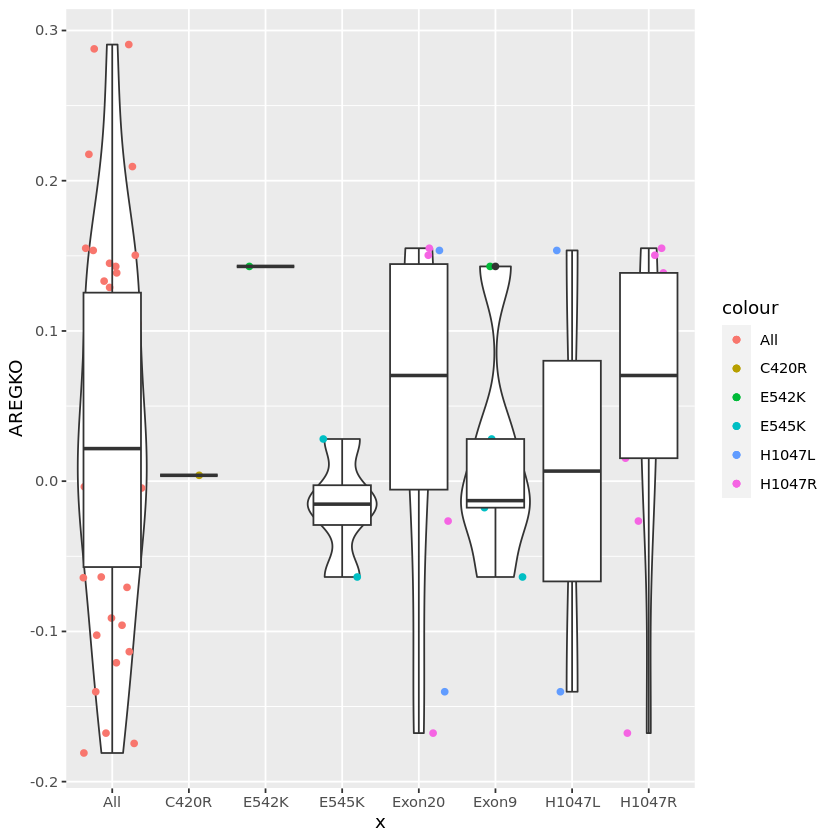

In [22]:
ggplot(subset_BreastAchillesResAREG_PIKMut, aes(x = "All", y = AREGKO)) +
  geom_violin() +
  geom_point(aes(color="All"), position = "jitter") +
  geom_boxplot() +
  geom_violin(data=subset_BreastAchillesResAREG_PIKMut, 
              aes(x = PIKMut, y = AREGKO)) +
  geom_point(data=subset_BreastAchillesResAREG_PIKMut, 
             aes(x = PIKMut, y = AREGKO, color = PIKMut), 
             position = "jitter") +
  geom_boxplot(data=subset_BreastAchillesResAREG_PIKMut, 
              aes(x = PIKMut, y = AREGKO)) + 
  geom_violin(data=subset_BreastAchillesResAREG_PIKMut, 
              aes(x = PIKMutClass, y = AREGKO)) +
  geom_point(data=subset_BreastAchillesResAREG_PIKMut, 
             aes(x = PIKMutClass, y = AREGKO, color = PIKMut), 
             position = "jitter") +
  geom_boxplot(data=subset_BreastAchillesResAREG_PIKMut, 
              aes(x = PIKMutClass, y = AREGKO))

In [23]:
stat_box_data <- function(y, 
                          upper_limit = max(subset_BreastAchillesResAREG_PIKMut$AREGKO) * 1.2) {
  return( 
    data.frame(
      y = -0.51,
      label = paste('count =', length(y), '\n',
                    'mean =', round(mean(y), 2), '\n')
    )
  )
}
stat_box_data

function(y, 
                          upper_limit = max(subset_BreastAchillesResAREG_PIKMut$AREGKO) * 1.2) {
  return( 
    data.frame(
      y = -0.51,
      label = paste('count =', length(y), '\n',
                    'mean =', round(mean(y), 2), '\n')
    )
  )
}

In [24]:
library(ggpubr)

Warning message:
“Removed 29 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Removed 29 rows containing missing values (`stat_boxplot()`).”
Warning message:
“Removed 30 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 30 rows containing missing values (`stat_boxplot()`).”
Warning message:
“Computation failed in `stat_compare_means()`
Caused by error:
! argument "x" is missing, with no default”
Warning message:
“Removed 29 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 30 rows containing missing values (`geom_point()`).”


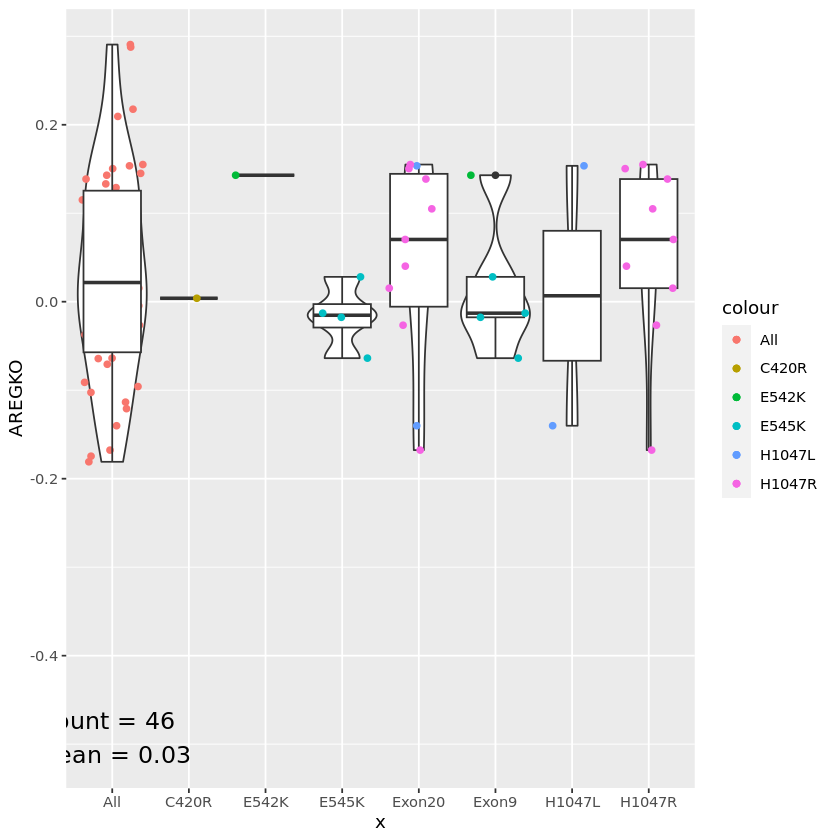

In [25]:
ggplot(subset_BreastAchillesResAREG_PIKMut, aes(x = "All", y = AREGKO)) +
  geom_violin() +
  geom_point(aes(color="All"), position = "jitter") +
  geom_boxplot() +
  geom_violin(data=subset_BreastAchillesResAREG_PIKMut, 
              aes(x = PIKMut, y = AREGKO)) +
  geom_boxplot(data=subset_BreastAchillesResAREG_PIKMut, 
              aes(x = PIKMut, y = AREGKO)) + 
  geom_point(data=subset_BreastAchillesResAREG_PIKMut, 
             aes(x = PIKMut, y = AREGKO, color = PIKMut), 
             position = "jitter") +
  geom_violin(data=subset_BreastAchillesResAREG_PIKMut, 
              aes(x = PIKMutClass, y = AREGKO)) +
  geom_boxplot(data=subset_BreastAchillesResAREG_PIKMut, 
              aes(x = PIKMutClass, y = AREGKO)) +
  geom_point(data=subset_BreastAchillesResAREG_PIKMut, 
             aes(x = PIKMutClass, y = AREGKO, color = PIKMut), 
             position = "jitter") +
  stat_compare_means(method = "wilcox.test", 
                               family = "Arial", size = 5) +
  stat_summary(fun.data = stat_box_data, geom = "text", hjust = 0.5, 
                         vjust = 0.52, family = "Arial", size = 5)

In [26]:
subset_BreastAchillesResAREG_PIKMut$PIKMut[is.na(
    subset_BreastAchillesResAREG_PIKMut$PIKMut)] <- "Not"
subset_BreastAchillesResAREG_PIKMut

,Broad_ID,CCLE_Name,Aliases,AREGKO,PIK3CA (5290),PIKMut,PIKMutClass
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,ACH-000017,SKBR3_BREAST,SK-BR-3,0.145049284,NA,Not,NA
2,ACH-000019,MCF7_BREAST,MCF7,0.028085638,1,E545K,Exon9
3,ACH-000028,KPL1_BREAST,KPL-1,-0.012940233,1,E545K,Exon9
5,ACH-000097,ZR751_BREAST,ZR-75-1,-0.120867377,NA,Not,NA
6,ACH-000111,HCC1187_BREAST,HCC1187,-0.095876631,NA,Not,NA
9,ACH-000147,T47D_BREAST,T-47D,0.040180794,1,H1047R,Exon20
10,ACH-000148,HS578T_BREAST,Hs 578T,0.033864366,NA,Not,NA
13,ACH-000212,CAL120_BREAST,CAL-120,0.217575910,NA,Not,NA
14,ACH-000223,HCC1937_BREAST,HCC1937,0.115089950,NA,Not,NA


Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Removed 6 rows containing missing values (`geom_text()`).”


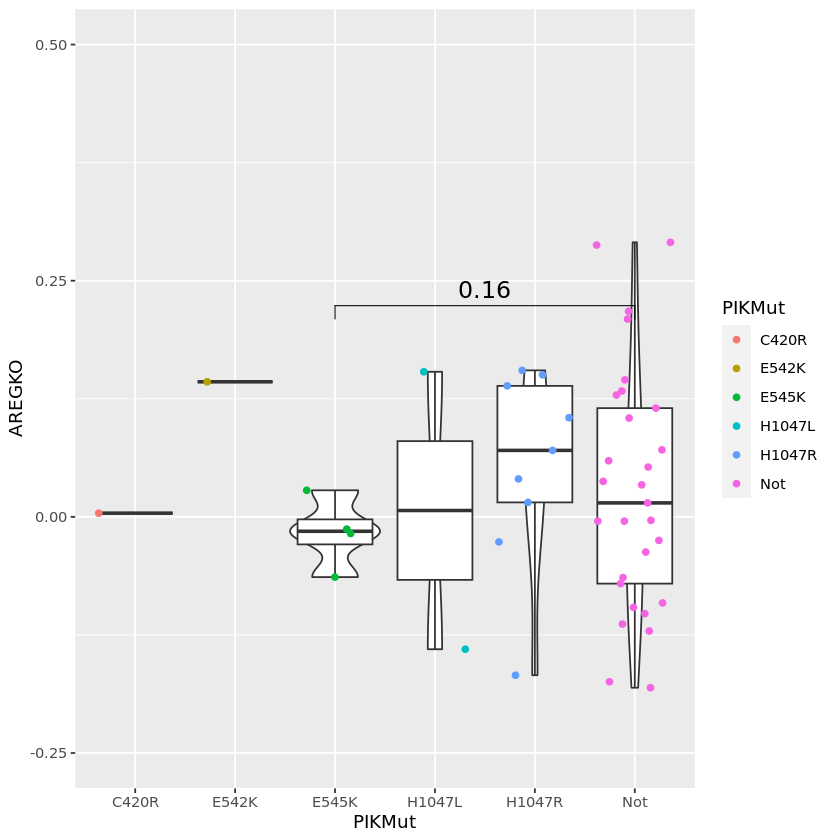

In [27]:
ggplot(subset_BreastAchillesResAREG_PIKMut, aes(x = PIKMut, y = AREGKO)) +
  geom_violin(data=subset_BreastAchillesResAREG_PIKMut) +
  geom_boxplot(data=subset_BreastAchillesResAREG_PIKMut) + 
  geom_point(data=subset_BreastAchillesResAREG_PIKMut, 
             aes(color = PIKMut), 
             position = "jitter") +
  stat_compare_means(comparisons = list(c("Not", "E545K")), 
                        method = "t.test", label.y = 0.2,
                        family = "Arial", size = 5) +
  stat_summary(fun.data = stat_box_data, geom = "text", hjust = 0.5, 
                         vjust = 0.52, family = "Arial", size = 3) +
  ylim(c(-0.25, 0.5))

## Plotting against all cancers

In [28]:
AchillesResAREG <- AchillesRes %>% select(c(1, 897))
names(AchillesResAREG) <- c("Broad_ID", "AREGKO")
AchillesResAREG

Broad_ID,AREGKO
<chr>,<dbl>
ACH-000001,0.039379284
ACH-000004,0.002432968
ACH-000005,-0.172769686
ACH-000007,0.039548142
ACH-000009,0.160436536
ACH-000011,-0.028362220
ACH-000012,0.036592013
ACH-000013,-0.031925717
ACH-000015,-0.049370696


In [29]:
total_cancerAREG <- left_join(AchillesResAREG, subset_BreastAchillesResAREG_PIKMut,
                              by = "Broad_ID")
total_cancerAREG

Broad_ID,AREGKO.x,CCLE_Name,Aliases,AREGKO.y,PIK3CA (5290),PIKMut,PIKMutClass
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
ACH-000001,0.039379284,NA,NA,NA,NA,NA,NA
ACH-000004,0.002432968,NA,NA,NA,NA,NA,NA
ACH-000005,-0.172769686,NA,NA,NA,NA,NA,NA
ACH-000007,0.039548142,NA,NA,NA,NA,NA,NA
ACH-000009,0.160436536,NA,NA,NA,NA,NA,NA
ACH-000011,-0.028362220,NA,NA,NA,NA,NA,NA
ACH-000012,0.036592013,NA,NA,NA,NA,NA,NA
ACH-000013,-0.031925717,NA,NA,NA,NA,NA,NA
ACH-000015,-0.049370696,NA,NA,NA,NA,NA,NA


In [30]:
unique(total_cancerAREG$PIKMut)

[1] NA       "Not"    "E545K"  "H1047R" "H1047L" "C420R"  "E542K"

In [31]:
total_cancerAREG$PIKMut[is.na(
    total_cancerAREG$PIKMut)] <- "NotBC"
total_cancerAREG

Broad_ID,AREGKO.x,CCLE_Name,Aliases,AREGKO.y,PIK3CA (5290),PIKMut,PIKMutClass
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
ACH-000001,0.039379284,NA,NA,NA,NA,NotBC,NA
ACH-000004,0.002432968,NA,NA,NA,NA,NotBC,NA
ACH-000005,-0.172769686,NA,NA,NA,NA,NotBC,NA
ACH-000007,0.039548142,NA,NA,NA,NA,NotBC,NA
ACH-000009,0.160436536,NA,NA,NA,NA,NotBC,NA
ACH-000011,-0.028362220,NA,NA,NA,NA,NotBC,NA
ACH-000012,0.036592013,NA,NA,NA,NA,NotBC,NA
ACH-000013,-0.031925717,NA,NA,NA,NA,NotBC,NA
ACH-000015,-0.049370696,NA,NA,NA,NA,NotBC,NA


In [32]:
total_cancerAREG_simplifiedcol <- total_cancerAREG$PIKMut %>% gsub(pattern = "E542K", 
                                                         replacement = "Not") %>%
                                                    gsub(pattern = "C420R",
                                                         replacement = "Not") %>%
                                                    gsub(pattern = "H1047L",
                                                         replacement = "Not")
total_cancerAREG_simplified <- total_cancerAREG
total_cancerAREG_simplified$PIKMut <- total_cancerAREG_simplifiedcol
total_cancerAREG_simplified

Broad_ID,AREGKO.x,CCLE_Name,Aliases,AREGKO.y,PIK3CA (5290),PIKMut,PIKMutClass
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
ACH-000001,0.039379284,NA,NA,NA,NA,NotBC,NA
ACH-000004,0.002432968,NA,NA,NA,NA,NotBC,NA
ACH-000005,-0.172769686,NA,NA,NA,NA,NotBC,NA
ACH-000007,0.039548142,NA,NA,NA,NA,NotBC,NA
ACH-000009,0.160436536,NA,NA,NA,NA,NotBC,NA
ACH-000011,-0.028362220,NA,NA,NA,NA,NotBC,NA
ACH-000012,0.036592013,NA,NA,NA,NA,NotBC,NA
ACH-000013,-0.031925717,NA,NA,NA,NA,NotBC,NA
ACH-000015,-0.049370696,NA,NA,NA,NA,NotBC,NA


In [33]:
unique(total_cancerAREG_simplified$PIKMut)

[1] "NotBC"  "Not"    "E545K"  "H1047R"

In [34]:
stat_box_data <- function(y, 
                          upper_limit = max(subset_BreastAchillesResAREG_PIKMut$AREGKO) * 1.2) {
  return(data.frame(y = -0.51,label = paste(
                    'Mean =', round(mean(y), 2))))}
stat_box_data

function(y, 
                          upper_limit = max(subset_BreastAchillesResAREG_PIKMut$AREGKO) * 1.2) {
  return(data.frame(y = -0.51,label = paste(
                    'Mean =', round(mean(y), 2))))}

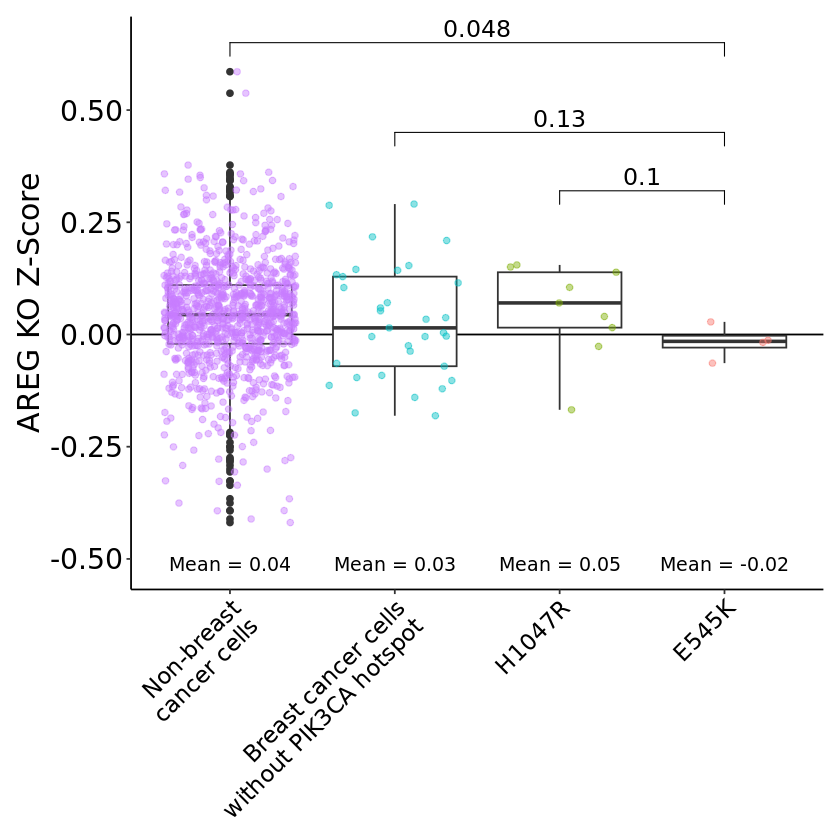

In [38]:
p <- total_cancerAREG_simplified %>% ggplot(aes(x = PIKMut, y = AREGKO.x)) +
  geom_hline(yintercept=0) +
#   geom_violin(draw_quantiles = c(0.25, 0.5, 0.75)) +
  geom_boxplot() + 
  geom_point(aes(color = PIKMut), 
             position = "jitter", alpha = 0.45) +
  stat_compare_means(comparisons = list(c("NotBC", "E545K"),
                                        c("Not", "E545K"),
                                        c("H1047R", "E545K")), 
                        method = "t.test", label.y = c(0.6,0.4, 0.27),
                        family = "Arial", size = 5) +
  stat_summary(fun.data = stat_box_data, geom = "text", hjust = 0.5, 
                         vjust = 0.52, family = "Arial", size = 4) +
#   ylim(c(-0.5, .625)) +
  scale_x_discrete(labels=c("NotBC" = "Non-breast\ncancer cells", 
                            "Not" = "Breast cancer cells\nwithout PIK3CA hotspot",
                            "H1047R" = "H1047R",
                            "E545K" = "E545K"),
                   limits=c("NotBC", "Not", "H1047R", "E545K")) +
  labs(y = "AREG KO Z-Score") +
  theme_classic() + theme(text = element_text(family = "Arial"),
                          axis.title.x = element_blank(),
                          axis.title.y = element_text(size = 18),
                          axis.text.x = element_text(size = 14, color = "black",
                                                   angle = 45, vjust = 1, hjust=1),
                          axis.text.y = element_text(size = 17, color = "black"),
                          plot.title = element_text(size = 20),
                          plot.subtitle = element_text(size = 14),
                          strip.text = element_text(size = 12),
                          legend.text = element_text(size = 12),
                          legend.title = element_text(size = 14),
                          legend.position="none",
                          plot.margin = margin(10, 10, 10, 10))
p

In [195]:
ggsave(filename="/data/park_lab/adam/figures/Achilles2-15.pdf", 
       plot = p, device = cairo_pdf, width = 8, height = 8)

Warning message:
“Removed 3 rows containing missing values (`geom_signif()`).”
